<a href="https://colab.research.google.com/github/EduardaNascimento0906/Analise-de-dados-medias-salariais-/blob/main/An%C3%A1lise_de_dados_salariais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aula 01 (Explore dados com pandas)** importando biblioteca pandas


In [1]:
import pandas as pd


In [2]:
df = pd. read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")


fazendo a análise do DataFrame

In [3]:
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linha, colunas = df.shape[0], df.shape[1]
print('linhas:', linha)
print('colunas:', colunas)

linhas: 133349
colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Renomeando as colunas do DataFrame

In [9]:
#Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

In [10]:
# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

In [11]:
# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Analisando quais são as categorias das colunas categóricas

Nível de senioridade

In [12]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


*Sigla	Significado	Descrição
SE	Senior	Profissional experiente (nível sênior)
MI	Mid	Nível intermediário
EN	Entry	Iniciante ou júnior (entry-level)
EX	Executive	Executivo, liderança sênior (C-Level)*

In [13]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


*FT	Full-time	Tempo integral – trabalho padrão de 40h/semana ou período completo
PT	Part-time	Meio período – carga horária reduzida
CT	Contract	Contrato temporário ou por projeto – geralmente por prazo determinado
FL	Freelance	Freelancer – trabalho autônomo ou por demanda, sem vínculo formal*

In [16]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


*O modelo remoto permite trabalhar de qualquer lugar sem precisar ir à empresa. O modelo presencial exige ir até o escritório todos os dias. O híbrido mistura os dois modelos. O modelo 'everywhere' é mais raro e permite trabalhar de qualquer lugar do mundo sem restrição de país ou cidade.*
*Sigla	Significado
0	Presencial
100	Remoto
50	Híbrido*

In [14]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


*Sigla	Significado	Descrição
M	Medium	Empresa de tamanho médio
L	Large	Empresa de tamanho grande
S	Small	Empresa de tamanho pequeno*

Modificando o nome das categorias

In [15]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()


,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [16]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()


,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [17]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [18]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Podemos também resumir as informações categóricas com o método describe(), exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [20]:

df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


Com isso já conseguimos responder algumas perguntas, como:


Qual o nível de experiência mais comum na base de dados?
Qual é o tipo de contrato mais frequente?
Qual o cargo mais frequente na amostra?
De qual país são a maioria dos profissionais da base?
Qual é o país onde mais empresas da amostra estão sediadas?
Qual o regime de trabalho mais comum?
Qual é o tamanho mais comum das empresas na amostra?
O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.

**Aula 2 (aprendendo a limpar e preparar dados)**

In [21]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.isnull().sum() #somatória/junção de todos os dados nulos que aparecem

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [23]:
df['ano'].unique()
#separação de todos os valores anos que aparecem na base de dados
#nam= not a number

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [24]:
df[df.isnull().any(axis=1)]
# mostrar os lugares onde o dado tem o valor nulo na base de dados

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


criando um dataframe demostrativo, para usar como exemplo de calculo de media e mediana

In [25]:
import numpy as np

df_salarios = pd.DataFrame({
   "Nome" : ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
   "salario" : [4000, np.nan, 5000, np.nan, 10000000 ]
})
#calcula a media e a mediana e substitui os nulos, e arrendonda os valores
df_salarios['salario_media'] = df_salarios['salario']. fillna (df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario']. fillna (df_salarios['salario'].median())

In [29]:
df_salarios

,Nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,3336333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,3336333.33,5000.0
4,Val,10000000.0,10000000.00,10000000.0


In [26]:
df_temperaturas = pd.DataFrame({
    "Dia" : ["segunda", "terça", "quarta", "quinta", "sexta"],
    "temperatura" : [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["temperatura"].ffill()

In [27]:
df_temperaturas

,Dia,temperatura,preenchido_ffill
0,segunda,30.0,30.0
1,terça,NaN,30.0
2,quarta,NaN,30.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0


In [28]:
df_cidades = pd.DataFrame({
    "nome" : ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    "cidade":["São Paulo", np.nan, "Curitiba", "Belém", np.nan]
})

df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("não informado")
df_cidades


,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,Belém,Belém
4,Val,NaN,não informado


In [29]:
df_limpo = df.dropna()

In [30]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [32]:
df_limpo.info()
#alterar a informação "ano", que está em casa decimal

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [33]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [34]:
df_limpo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [35]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


**Aula 3 (criando gráficos e contando histórias com dados)**

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

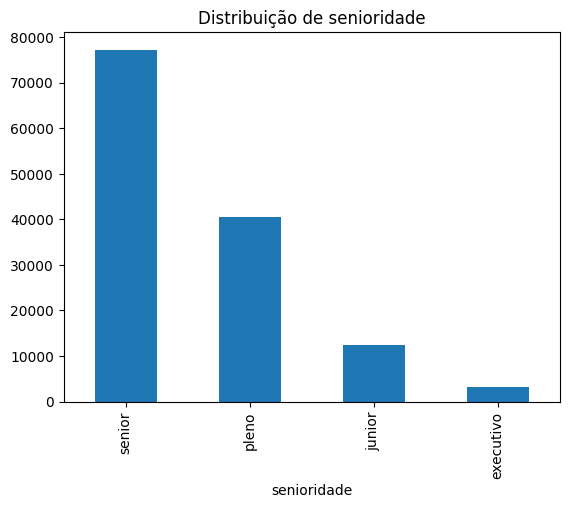

In [36]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")

criando um deshboard de dados com matplotlib e seaborn, são bibliotecas de visualização

In [37]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

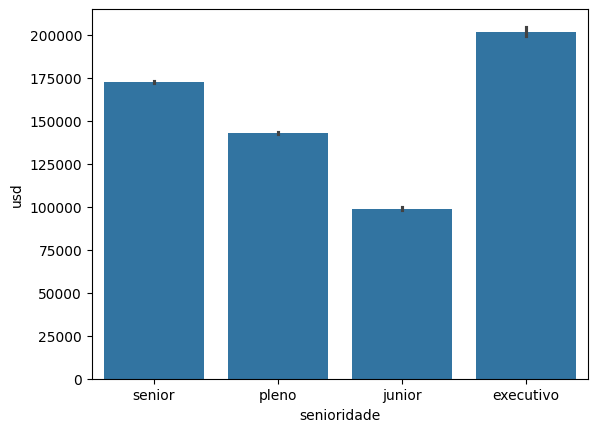

In [38]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [39]:
import matplotlib.pyplot as plt

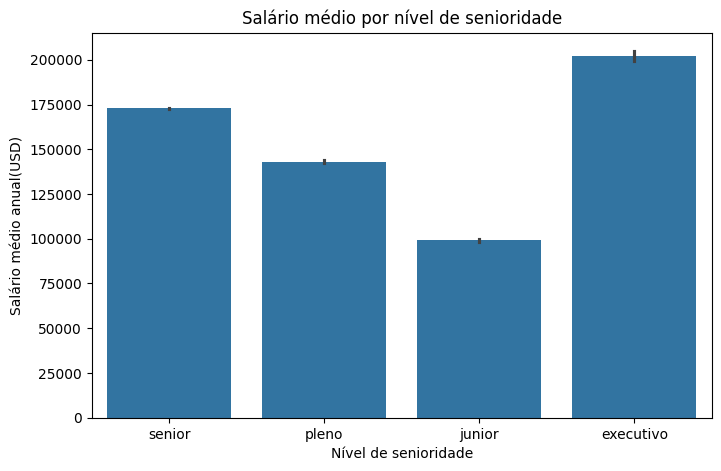

In [40]:
plt.figure(figsize= (8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário médio anual(USD)')
plt.show()

In [41]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
executivo,202027.667813
senior,172850.838301
pleno,143044.845979
junior,99034.963267


criação da variável "ordem"

variável: armazena um determinado valor para que não seja necessário repetir linhas de código.

variável criada com o objetivo de dar ordem ao gráfico, trazendo uma melhor visualização. "(ascening=false)" coloca a ordem decrescente. "(ascening=true)" coloca a ordem crescente.

In [42]:
ordem= df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

In [43]:
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

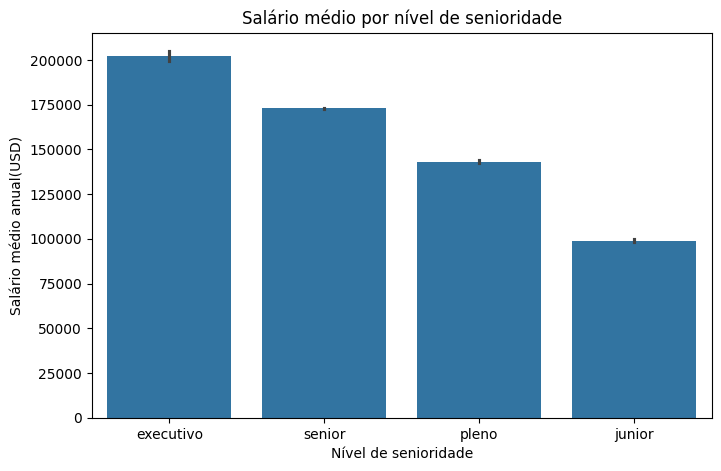

In [44]:
plt.figure(figsize= (8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário médio anual(USD)')
plt.show()

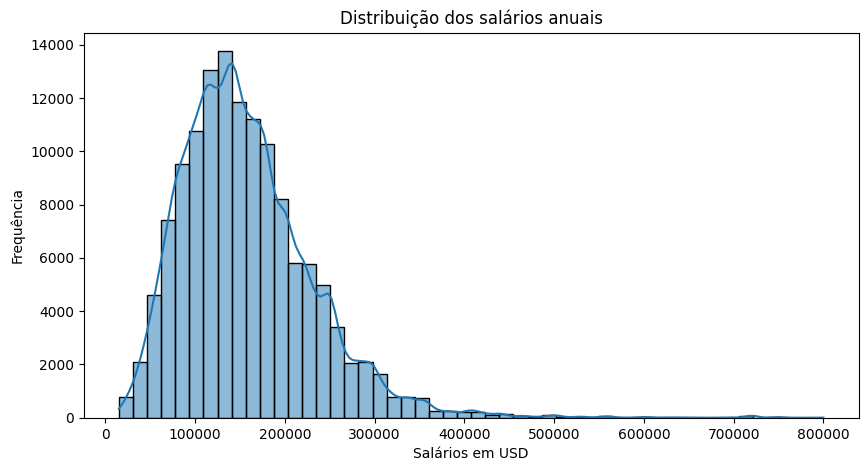

In [45]:
plt.figure(figsize= (10,5))
sns.histplot(df_limpo['usd'], bins= 50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salários em USD')
plt.ylabel('Frequência')
plt.show()

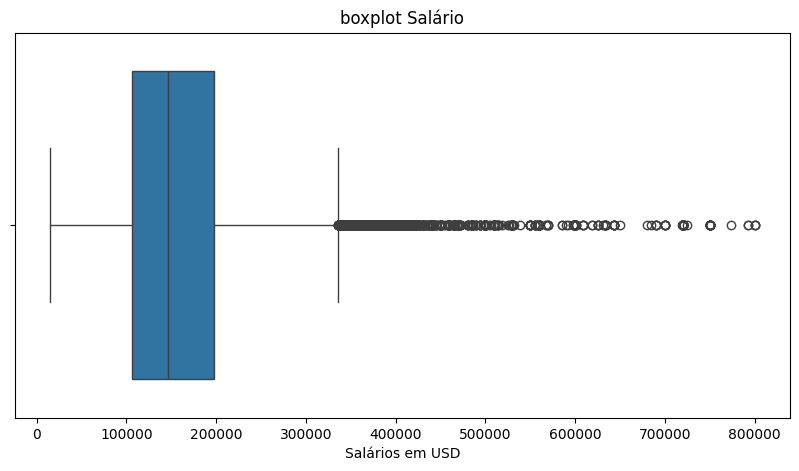

In [46]:
plt.figure(figsize= (10,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('boxplot Salário')
plt.xlabel('Salários em USD')
plt.show()

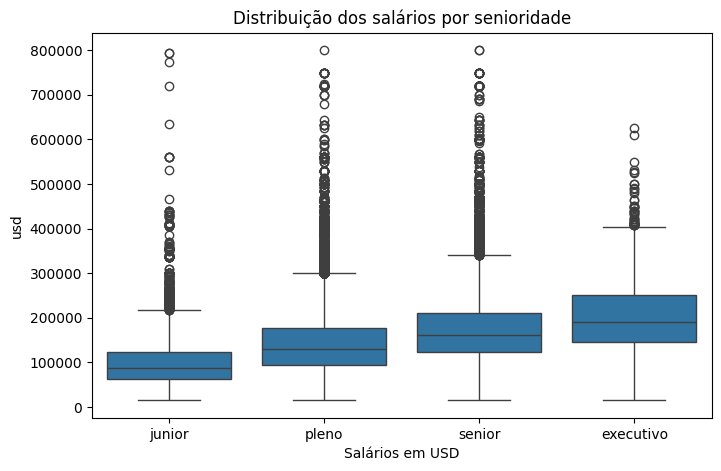

In [47]:
Ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=Ordem_senioridade)
plt.title('Distribuição dos salários por senioridade')
plt.xlabel('Salários em USD')
plt.show()


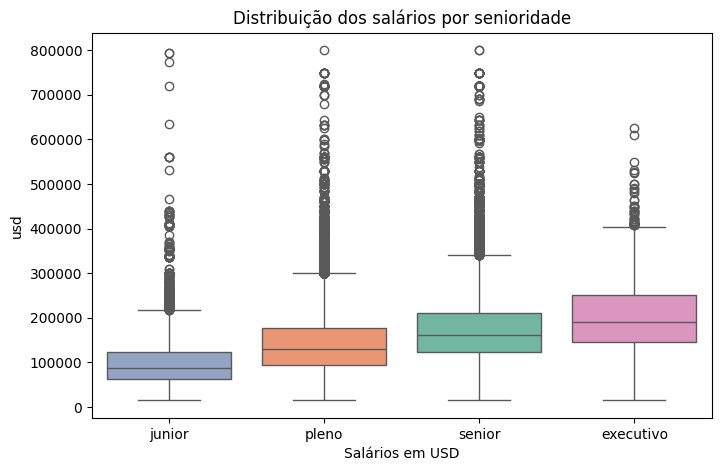

In [48]:
Ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=Ordem_senioridade, palette='Set2', hue='senioridade' )
plt.title('Distribuição dos salários por senioridade')
plt.xlabel('Salários em USD')
plt.show()

In [49]:
import plotly.express as px

In [50]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names= 'tipo_trabalho',
             values='quantidade',
             title='Proporção de Trabalho Remoto'
             )

fig.show()


In [51]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names= 'tipo_trabalho',
             values='quantidade',
             title='Proporção de Trabalho Remoto',
             hole=0.5
             )

fig.show()

In [52]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names= 'tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
             )
fig.update_traces(textinfo='percent+label')
fig.show()

**Aula 4 (criando dashboard interativo)**